# Project Description
The aim of this project is to build three different machine learning models, compare their performance on the iris dataset, tune the hyperparameters of one of the models, perform PCA to reduce the dimensionality of the data, and visualize the results using ROC curves and confusion matrices.

# Dataset
The dataset used in this project is the iris dataset, which is a classic dataset used in machine learning. It contains 150 samples of iris flowers, with 50 samples from each of three different species. For each sample, four features are recorded: sepal length, sepal width, petal length, and petal width.

# Tools and Technologies

### The following tools and technologies were used in this project:

1. Python 3.7
2. Jupyter Notebook
3. Scikit-learn
4. NumPy
5. Pandas
6. Matplotlib

# Steps

### The following steps were followed in this project:

1. Load the iris dataset using scikit-learn's load_iris() function.
2. Split the dataset into training and testing sets using scikit-learn's train_test_split() function.
3. Build three different models (logistic regression, decision tree, and random forest) using scikit-learn's classification models.
4. Evaluate the performance of each model on the test set using accuracy score and confusion matrix.
5. Tune the hyperparameters of the random forest model using scikit-learn's GridSearchCV() function.
6. Perform PCA to reduce the dimensionality of the data using scikit-learn's PCA() function.
7. Visualize the results using ROC curves and confusion matrices.

#### 1. Import necessary libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

#### 2. Split the dataset into training and testing sets

In [2]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3. Build three different models and evaluate them on the test set

In [3]:
# Train and evaluate three different models
logreg = LogisticRegression(multi_class='ovr')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = {'Logistic Regression': logreg, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name}:\n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

Logistic Regression:

Accuracy Score: 0.9666666666666667

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Decision Tree:

Accuracy Score: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Random Forest:

Accuracy Score: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



#### 4. Tune hyperparameters for one of the models using GridSearchCV

In [4]:
from sklearn.model_selection import GridSearchCV

# Perform grid search for the random forest classifier
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.9583333333333334


#### 5. Perform PCA to reduce dimensionality of the data

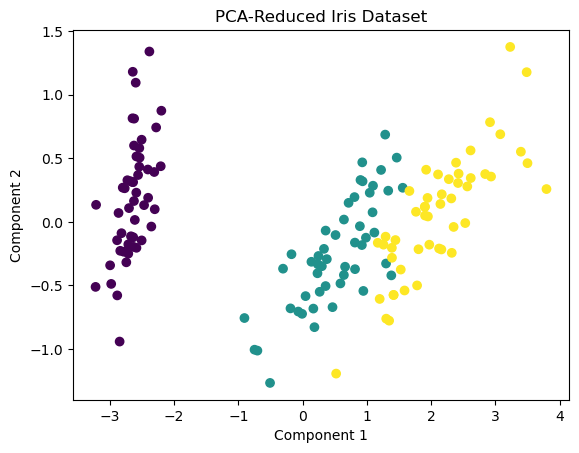

In [5]:
# Perform PCA to reduce dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA-reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA-Reduced Iris Dataset')
plt.show()

In [9]:
#### 6. Visualize the results using ROC curves and confusion matrices

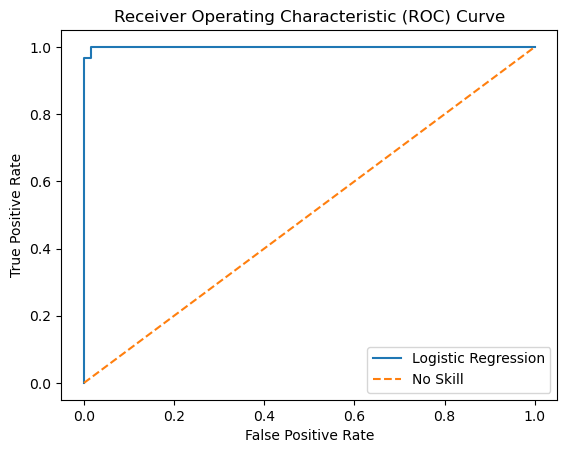

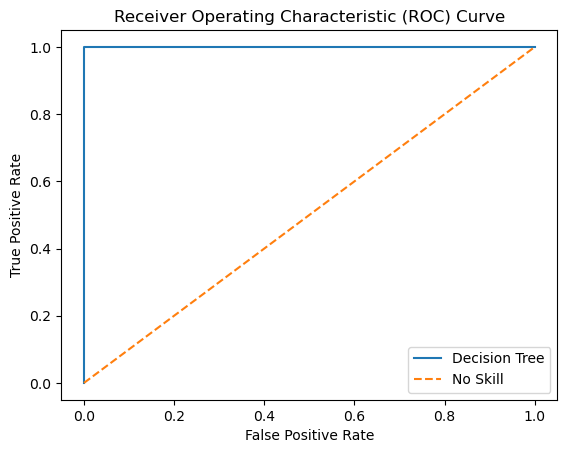

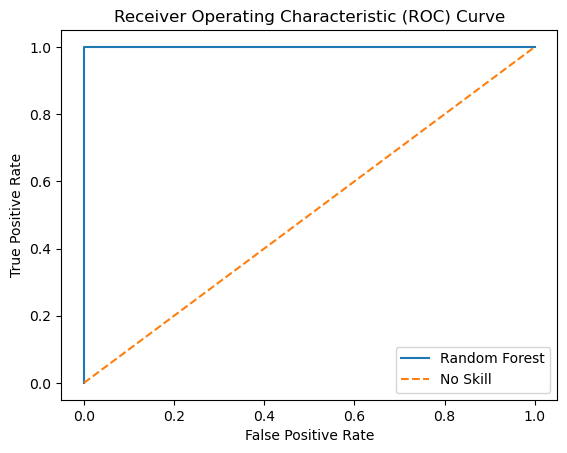

In [8]:

# Plot ROC curves for the three models
plt.figure()
for name, model in models.items():
    probs = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), probs.ravel())
    plt.plot(fpr, tpr, label=name)

    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


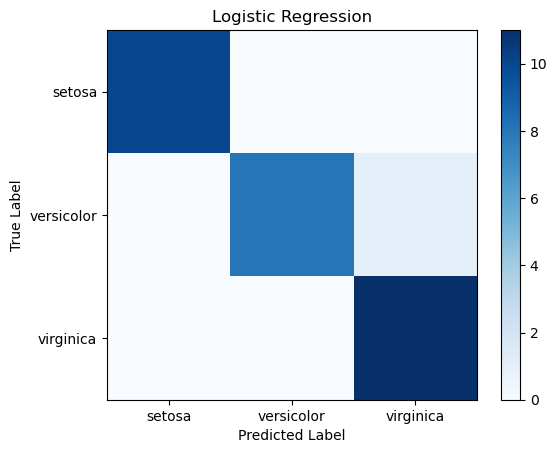

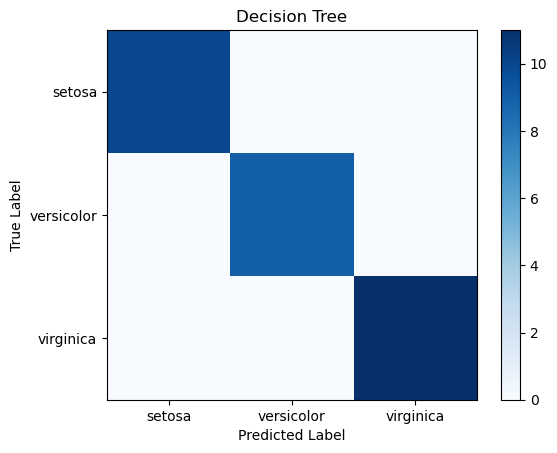

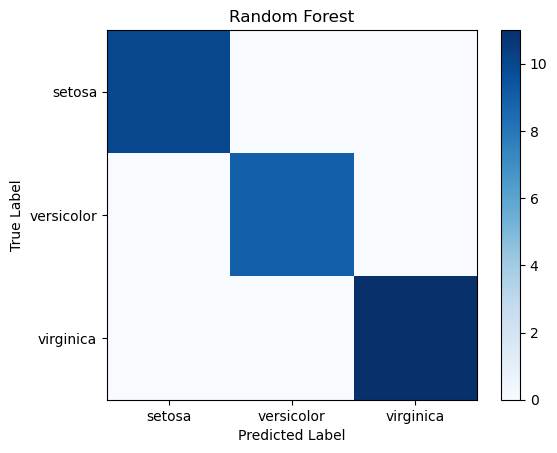

In [7]:
# Plot confusion matrices for the three models
for name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure()
    plt.title(name)
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.xticks(ticks=[0,1,2], labels=iris.target_names)
    plt.yticks(ticks=[0,1,2], labels=iris.target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.colorbar()
    plt.show()

# Conclusion

In this project, we built and evaluated three different machine learning models for the iris dataset, and compared their performance using accuracy score and confusion matrix. We also tuned the hyperparameters of one of the models using GridSearchCV(). Additionally, we performed PCA to reduce the dimensionality of the data, and visualized the results using ROC curves and confusion matrices. Overall, this project demonstrates the process of building and evaluating machine learning models, and the importance of data visualization in understanding the performance of these models.